<a href="https://www.kaggle.com/code/imadnadi/image-generator?scriptVersionId=136056977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# I. Import library


In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Memory growth True
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:


# Folder path containing the images
folder_path = "/kaggle/input/avatar-icons-3000example/Character_images"

# List to store the images
image_list = []

# Get a list of image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Iterate through the image files
for file in image_files:
    file_path = os.path.join(folder_path, file)

    # Read the image using cv2
    image = cv2.imread(file_path)
    image = image[ 32:288 , 184:440 ]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to 512x512
    image = cv2.resize(image, (128, 128))
    
    # change value from (0 -> 255) to (0 -> 1)
    image = image.astype(np.float32) / 255.0

    # Append the resized image to the list
    image_list.append(image)

# Print the number of images and display the image list
print(f"Number of images: {len(image_list)}")

# Convert the image list to a NumPy array
image_list = np.array(image_list)






# Delete unnecessary variables
del image_files


Number of images: 2919


In [4]:
Aimage = image_list[27]

Image size: (128, 128, 3)


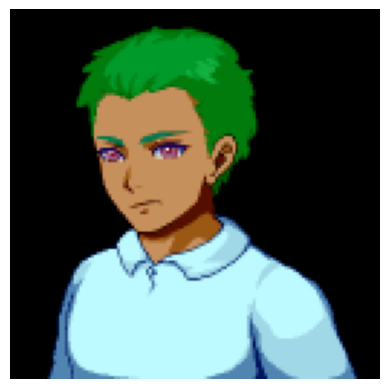

In [5]:
# Get the shape of the image 

print(f"Image size: {Aimage.shape}")

# Display the first resized image using matplotlib
plt.imshow(Aimage)
plt.axis('off')
plt.show()

In [6]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D
from tensorflow.keras import layers


In [7]:
### Model_generator Build 

def build_generator(): 
    
    
    model = tf.keras.Sequential()
    model.add(layers.Dense(32 * 32 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((32, 32, 256)))
    assert model.output_shape == (None, 32, 32, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same'))
    assert model.output_shape == (None, 32, 32, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    assert model.output_shape == (None, 64, 64, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='sigmoid'))
    assert model.output_shape == (None, 128, 128, 3)
    
    return model

In [8]:
generator = build_generator()

In [9]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 262144)            26214400  
                                                                 
 batch_normalization (BatchN  (None, 262144)           1048576   
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 262144)            0         
                                                                 
 reshape (Reshape)           (None, 32, 32, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 128)      819328    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 128)      5

1/1 [==============================] - 6s 6s/step
(128, 128, 3)
(128, 128, 3)


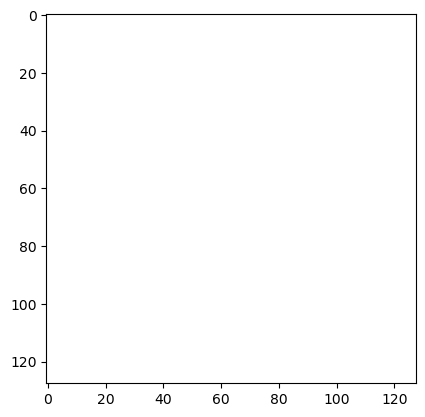

In [10]:
img = generator.predict(np.random.randn(4,100 , 1))
# Display the first resized image using matplotlib
print(img[0].shape)

img = img*255
print(img[0].shape)

plt.imshow(img[0])


plt.axis('on')
plt.show()


In [11]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(64, 5, input_shape = (128,128,3)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [12]:
discriminator = build_discriminator()

In [13]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 124, 124, 64)      0         
                                                                 
 dropout (Dropout)           (None, 124, 124, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      102464    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 120, 120, 64)      0         
                                                                 
 dropout_1 (Dropout)         (None, 120, 120, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 128)    

In [14]:
img.shape

(4, 128, 128, 3)

In [15]:
discriminator.predict(img)

1/1 [==============================] - 1s 936ms/step


array([[0.99824286],
       [0.99822205],
       [0.9982438 ],
       [0.9982551 ]], dtype=float32)

In [16]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy
g_opt = Adam(learning_rate=0.0001) 
d_opt = Adam(learning_rate=0.00001) 
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [17]:
# Importing the base model class to subclass our training step 
from tensorflow.keras.models import Model

In [18]:
class Avatar_GAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((32, 100, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((32,100,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [19]:
# Create instance of subclassed model
avatargan = Avatar_GAN(generator, discriminator)
# Compile the model
avatargan.compile(g_opt, d_opt, g_loss, d_loss)

In [20]:
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [21]:
import time

In [22]:
# Fit the Model

T = time.time()

for i in range(1):
    avatargan.fit(image_list[i*32:((i+1)*32)-1], epochs=3000 )
    print(f"its loop N:{i}")

print(f"its take in all ephochs and exempels{(time.time() - T)/60} minutes")

Epoch 1/3000


2023-07-07 21:57:01.092516: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1/1 [==============================] - 19s 19s/step - d_loss: 0.6774 - g_loss: 0.8280
Epoch 2/3000
1/1 [==============================] - 0s 418ms/step - d_loss: 0.6242 - g_loss: 0.9302
Epoch 3/3000
1/1 [==============================] - 0s 422ms/step - d_loss: 0.5747 - g_loss: 1.0196
Epoch 4/3000
1/1 [==============================] - 0s 423ms/step - d_loss: 0.5248 - g_loss: 1.0983
Epoch 5/3000
1/1 [==============================] - 0s 420ms/step - d_loss: 0.4833 - g_loss: 1.1666
Epoch 6/3000
1/1 [==============================] - 0s 420ms/step - d_loss: 0.4398 - g_loss: 1.2253
Epoch 7/3000
1/1 [==============================] - 0s 419ms/step - d_loss: 0.4111 - g_loss: 1.2730
Epoch 8/3000
1/1 [==============================] - 0s 421ms/step - d_loss: 0.3679 - g_loss: 1.3119
Epoch 9/3000
1/1 [==============================] - 0s 418ms/step - d_loss: 0.3420 - g_loss: 1.3492
Epoch 10/3000
1/1 [==============================] - 0s 418ms/step - d_loss: 0.2960 - g_loss: 1.3851
Epoch 11/3000

1/1 [==============================] - 0s 94ms/step


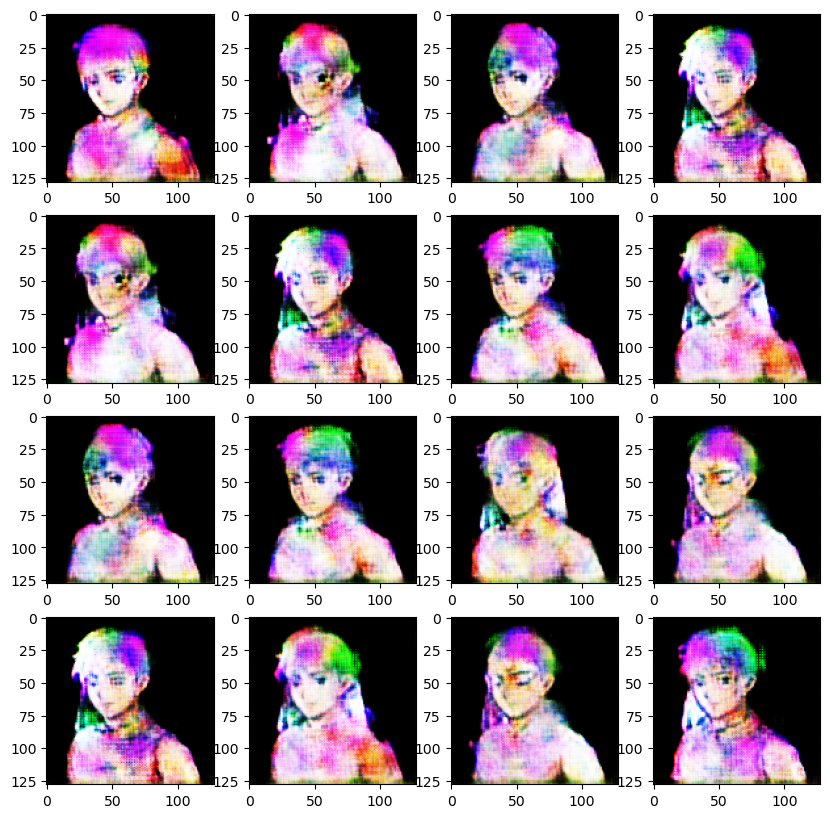

In [23]:
# An Exemple of generation
imgs = generator.predict(tf.random.normal((16, 100, 1)))
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [24]:
# save A image
#img = array_to_img(img[0])
#img.save(os.path.join(f'curser.png'))

In [25]:
# Save Models
generator.save('generator.h5')
discriminator.save('discriminator.h5')